<a href="https://colab.research.google.com/github/venkateshakula1729/BSE662-Course-Project-Foraging-Based/blob/master/MNE%20python%20group/Foraging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install MNE version 1.8
!pip install mne==1.8.0
!pip install fooof
from fooof import FOOOF
import numpy as np
import mne


In [ ]:
# Import required libraries
import mne
import matplotlib.pyplot as plt

Loading 31730.set ...
Loading 43000.set ...
Loading 47131.set ...
Loading 47204.set ...
Loading 47324.set ...
Loading 48238.set ...
Plotting PSD of the raw data...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


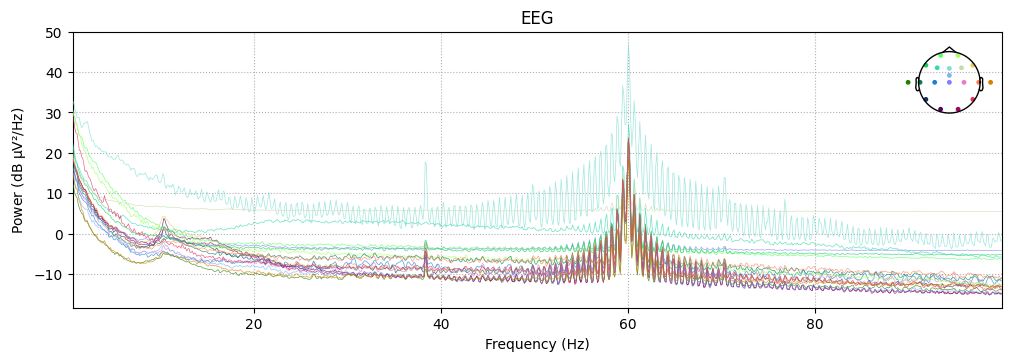

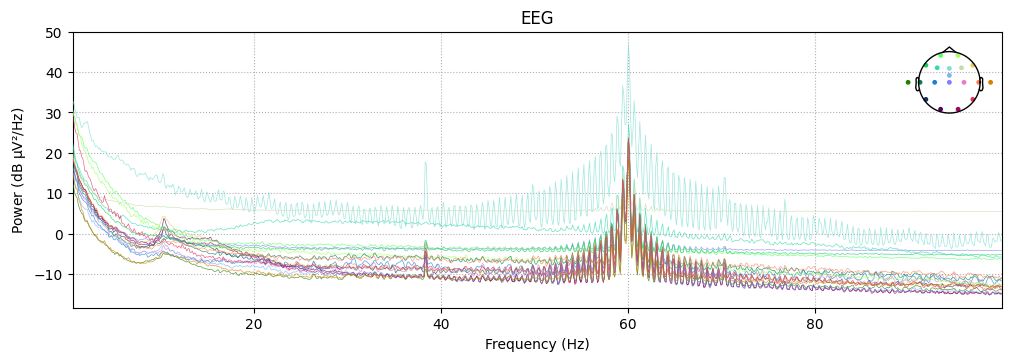

In [ ]:


# Define the list of set files
set_files = ['31730.set', '43000.set', '47131.set', '47204.set', '47324.set', '48238.set']

# Load each .set file into an MNE Raw object
raw_list = []
for fname in set_files:
    print(f"Loading {fname} ...")
    raw = mne.io.read_raw_eeglab(fname, preload=True)
    raw_list.append(raw)

# For demonstration, we will process the first file in the list
raw = raw_list[0]

# -------------------------------
# STEP 1: Plot PSD of the raw data
# -------------------------------
print("Plotting PSD of the raw data...")
raw.plot_psd(fmin=0.5, fmax=100, show=True)




In [ ]:

# -------------------------------
# STEP 2: Clean the data
#   2.1. Since line noise is known to be 60 Hz in America, we directly apply a notch filter.
# -------------------------------
print("Applying notch filter at 60 Hz to remove line noise...")
raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)


# -------------------------------
#   2.2. We apply a bandpass filter between 0.5 and 90 Hz.
# -------------------------------
print("Applying bandpass filter (0.5 - 90 Hz) on the cleaned data...")
raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)



Applying notch filter at 60 Hz to remove line noise...
Applying bandpass filter (0.5 - 90 Hz) on the cleaned data...


<RawEEGLAB | 31730.set, 19 x 1322500 (5290.0 s), ~191.7 MB, data loaded>

Plotting PSD of the cleaned data...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


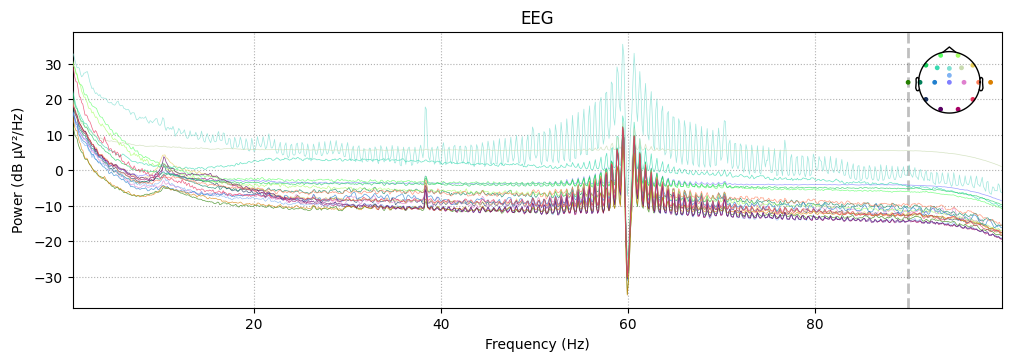

In [ ]:

# -------------------------------
# STEP 3: Plot the PSD of the cleaned data
# -------------------------------
print("Plotting PSD of the cleaned data...")
raw_clean.plot_psd(fmin=0.5, fmax=100, show=True)

plt.show()

In [ ]:

# -------------------------------
# STEP 3: Marker Extraction
# -------------------------------

print("Extracting event markers from annotations...")

# We try to retrieve annotations from the cleaned raw data
annotations = raw_clean.annotations
print("Annotations:")
print(annotations)

# We assume that each annotation's description has a format like "TRIGGER EVENT X".
unique_markers = set(desc.split()[-1].strip() for desc in annotations.description)
print("Unique marker letters extracted:", unique_markers)

# We initialize a dictionary to count trials for each condition:
# - 'pre_short' and 'pre_long' for prestress conditions;
# - 'post_short' and 'post_long' for poststress conditions.
trial_counts = {"pre_short": 0, "pre_long": 0, "post_short": 0, "post_long": 0}

# We use a variable to keep track of the current stress condition based on block markers.
current_block = None

# We Loop over all annotations in time order.
# Marker codes (as expected) are:
#   B: Start of prestress block
#   I: Start of poststress block
#   T: Travel time ~5s   -> short environment trial
#   U: Travel time ~20s  -> long environment trial

for onset, desc in zip(annotations.onset, annotations.description):
    # We will extract the marker letter from the annotation by taking the last token.
    marker = desc.split()[-1].strip()

    if marker == 'B':
        current_block = 'pre'
    elif marker == 'I':
        current_block = 'post'
    # Only count travel time markers if we have a valid current block
    elif marker in ['T', 'U'] and current_block is not None:
        if marker == 'T':
            trial_counts[f"{current_block}_short"] += 1
        elif marker == 'U':
            trial_counts[f"{current_block}_long"] += 1

print("Trial counts per environment:")
print(trial_counts)

Extracting event markers from annotations...
Annotations:
<Annotations | 896 segments: TRIGGER EVENT A (1), TRIGGER EVENT B (1), ...>
Unique marker letters extracted: {'P', 'O', 'H', 'S', 'N', 'M', 'R', '22', 'F', 'C', 'B', 'U', 'I', 'E', 'J', 'D', 'T', 'X', 'G', 'Z', 'A', 'Q'}
Trial counts per environment:
{'pre_short': 41, 'pre_long': 32, 'post_short': 41, 'post_long': 34}



Processing file: 31730.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


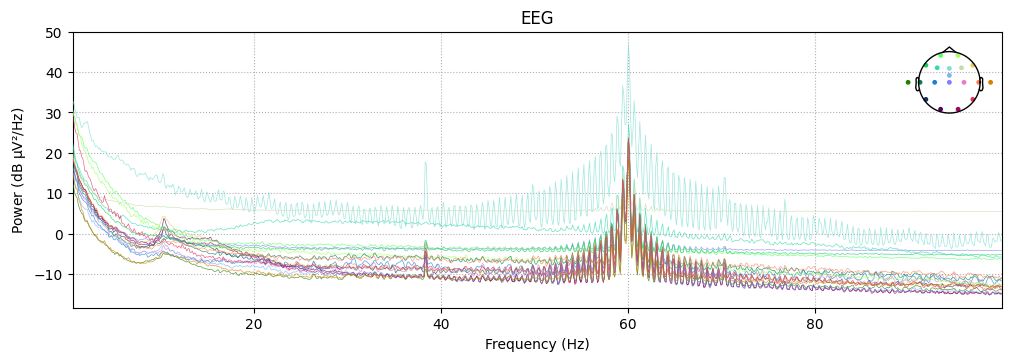

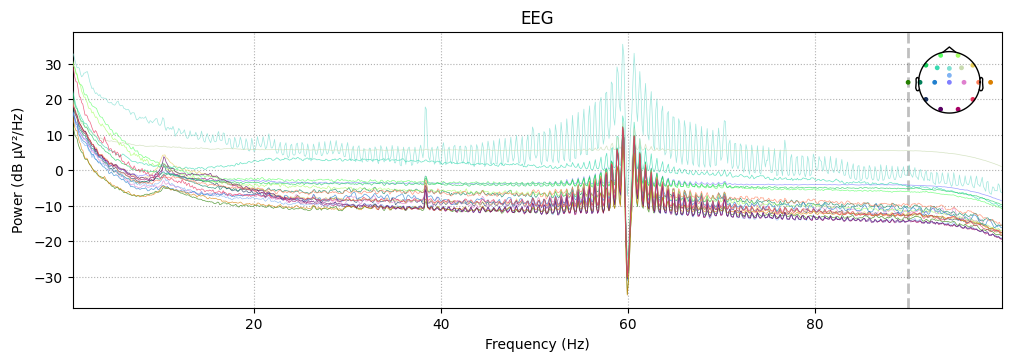

Unique marker letters found: {'E', 'M', 'Z', 'S', 'N', 'G', 'Q', 'T', '22', 'F', 'J', 'X', 'D', 'O', 'P', 'R', 'H', 'U', 'B', 'C', 'I', 'A'}
Trial counts for this file:
{'pre_short': 41, 'pre_long': 32, 'post_short': 41, 'post_long': 34}

Processing file: 43000.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


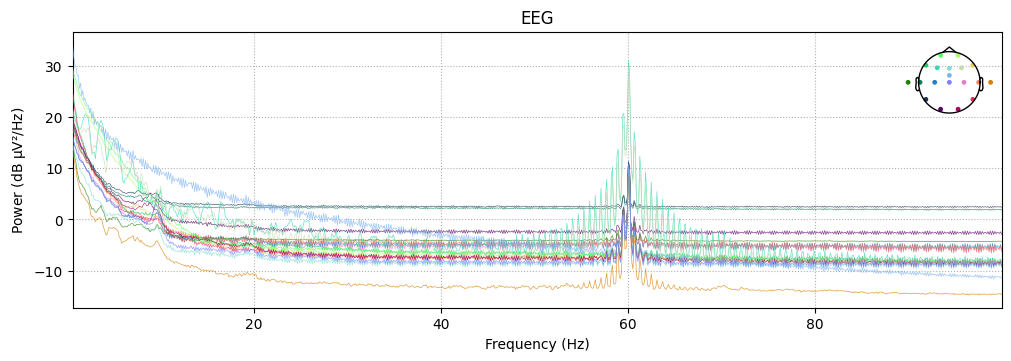

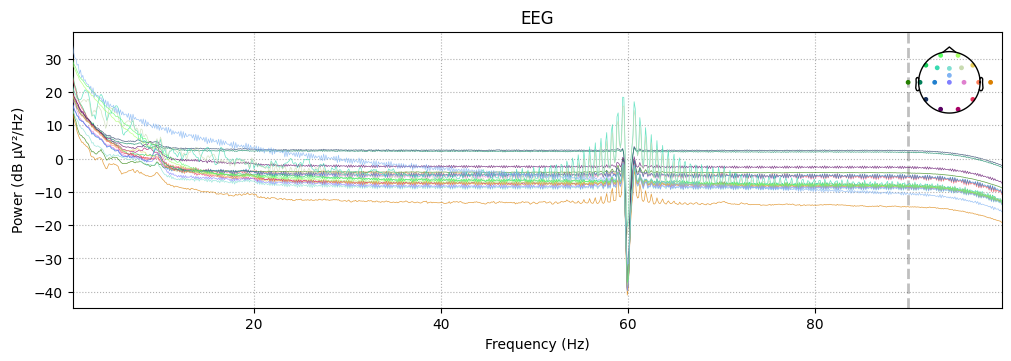

Unique marker letters found: {'E', 'M', 'Z', 'S', 'N', 'G', 'Q', 'T', 'F', 'J', 'D', 'O', 'P', 'R', 'H', 'U', 'B', 'C', 'I', 'A'}
Trial counts for this file:
{'pre_short': 42, 'pre_long': 39, 'post_short': 44, 'post_long': 39}

Processing file: 47131.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


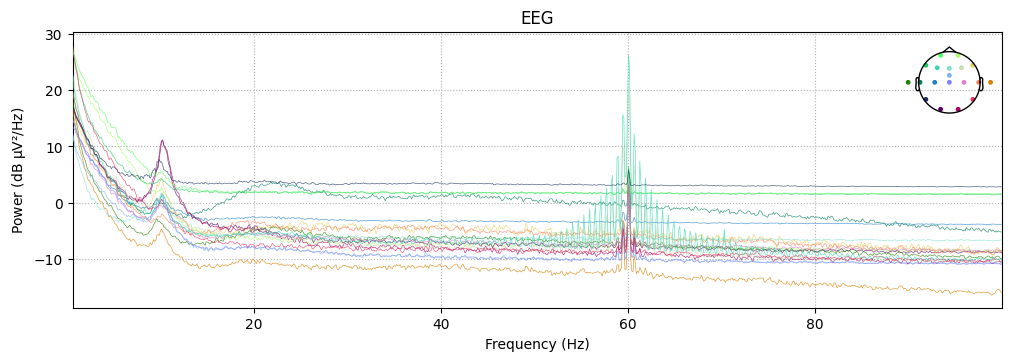

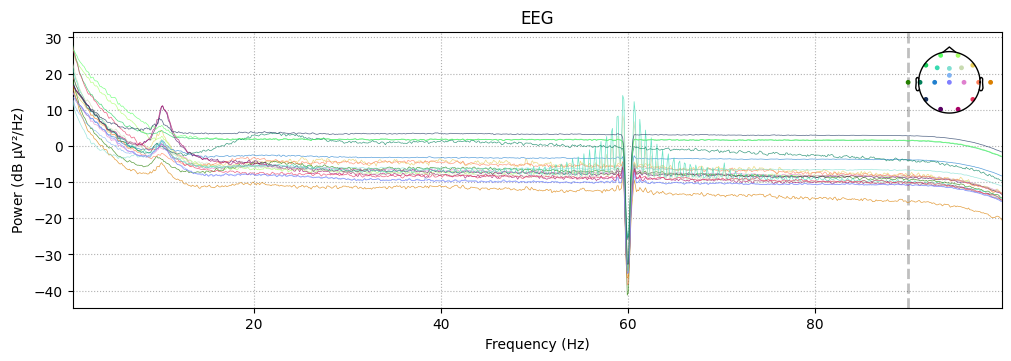

Unique marker letters found: {'E', '24', 'Event', 'M', 'Z', 'S', 'N', 'G', 'Q', 'T', 'K', 'F', 'J', 'X', 'D', 'O', 'P', 'R', 'H', 'U', 'B', 'C', 'I', 'A'}
Trial counts for this file:
{'pre_short': 44, 'pre_long': 39, 'post_short': 44, 'post_long': 40}

Processing file: 47204.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


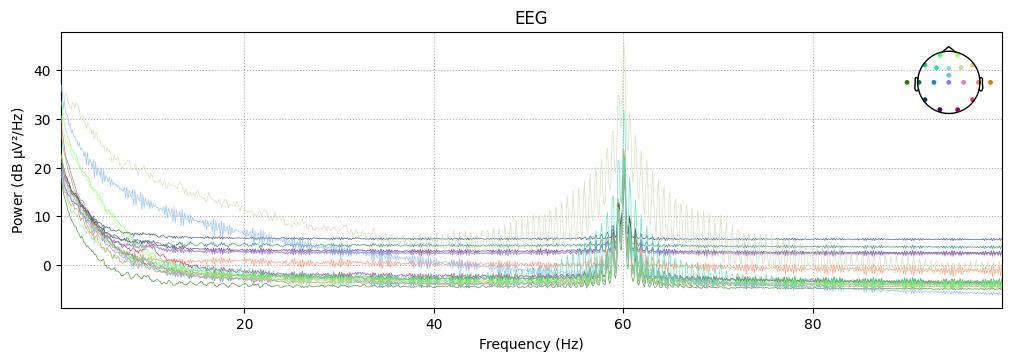

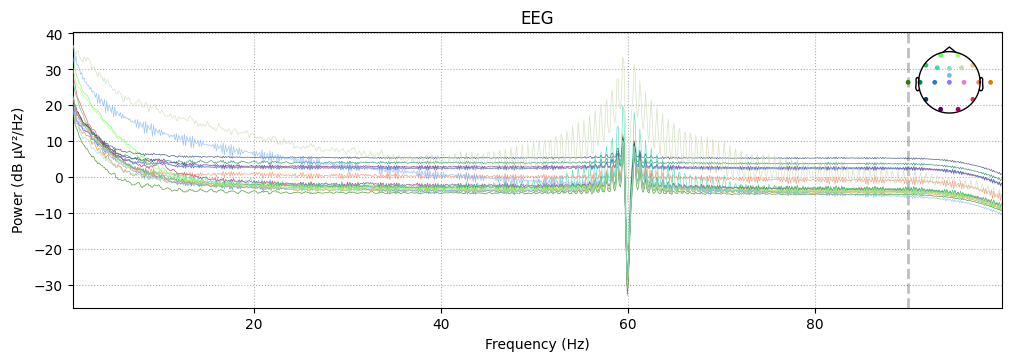

Unique marker letters found: {'E', 'Event', 'M', 'Z', 'S', 'N', 'G', 'Q', 'T', '22', 'F', 'J', 'D', 'O', 'P', 'R', 'H', 'U', 'B', 'C', 'I', 'A'}
Trial counts for this file:
{'pre_short': 32, 'pre_long': 37, 'post_short': 43, 'post_long': 38}

Processing file: 47324.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


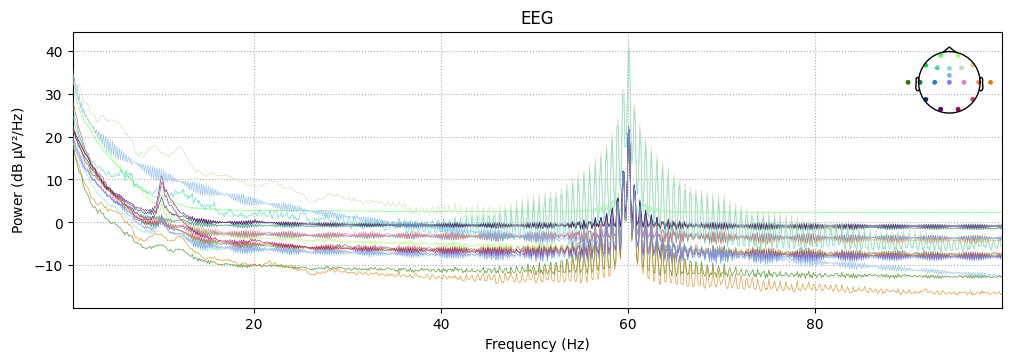

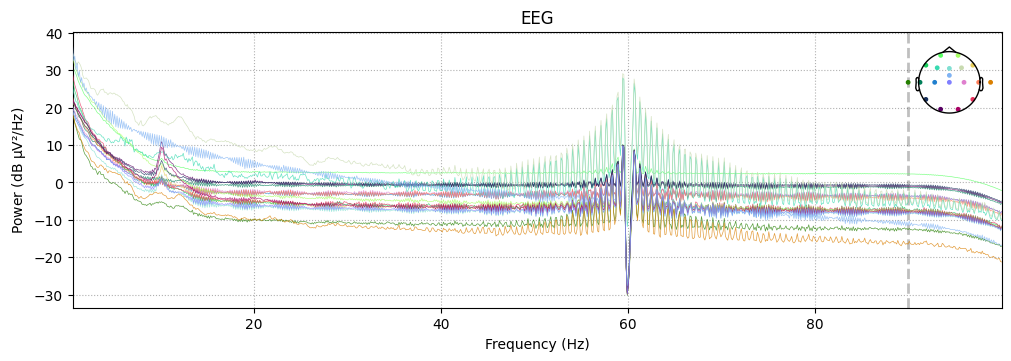

Unique marker letters found: {'E', 'M', 'Z', 'S', 'N', 'G', 'Q', 'T', 'F', 'J', 'D', 'O', '21', 'P', 'R', 'H', 'U', 'B', 'C', 'I', 'A'}
Trial counts for this file:
{'pre_short': 40, 'pre_long': 28, 'post_short': 40, 'post_long': 23}

Processing file: 48238.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


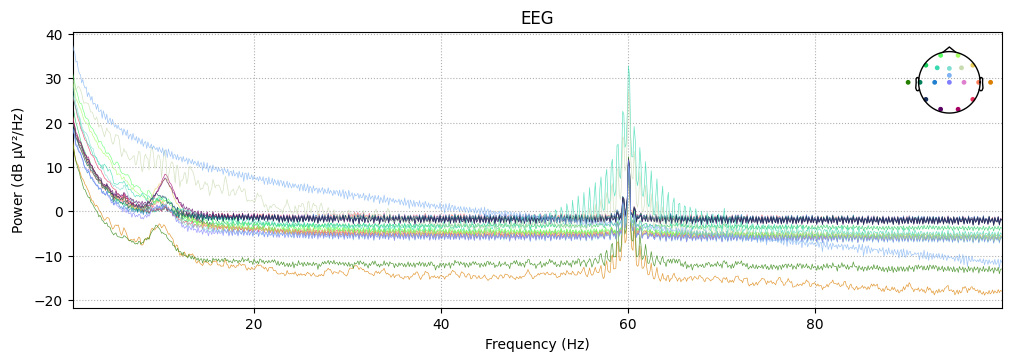

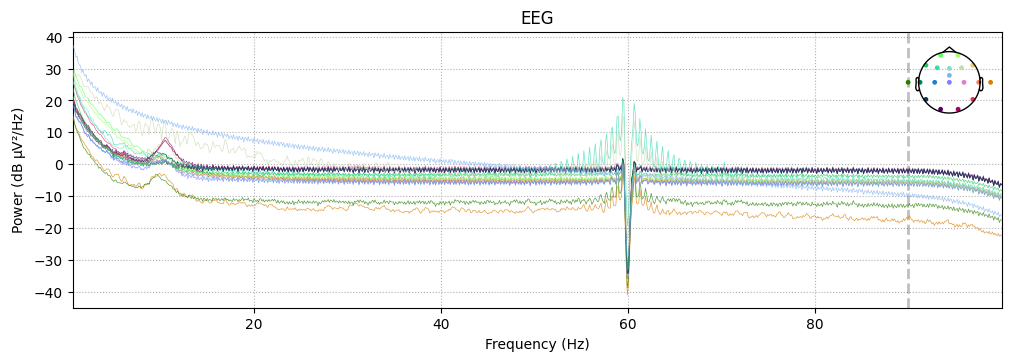

Unique marker letters found: {'E', 'M', 'Z', 'S', 'N', 'G', 'Q', 'T', 'F', 'J', 'D', 'O', '21', 'P', 'R', 'H', 'U', 'B', 'C', 'I', 'A'}
Trial counts for this file:
{'pre_short': 41, 'pre_long': 37, 'post_short': 45, 'post_long': 39}


========== FINAL SUMMARY ==========

File: 31730.set
  pre_short: 41
  pre_long: 32
  post_short: 41
  post_long: 34

File: 43000.set
  pre_short: 42
  pre_long: 39
  post_short: 44
  post_long: 39

File: 47131.set
  pre_short: 44
  pre_long: 39
  post_short: 44
  post_long: 40

File: 47204.set
  pre_short: 32
  pre_long: 37
  post_short: 43
  post_long: 38

File: 47324.set
  pre_short: 40
  pre_long: 28
  post_short: 40
  post_long: 23

File: 48238.set
  pre_short: 41
  pre_long: 37
  post_short: 45
  post_long: 39


In [ ]:
# Replicating the analysis for all the files

# List of .set files
set_files = ['31730.set', '43000.set', '47131.set', '47204.set', '47324.set', '48238.set']

# Store all results
all_trial_counts = {}

# Loop through each file
for fname in set_files:
    print(f"\n{'='*50}")
    print(f"Processing file: {fname}")
    print(f"{'='*50}")

    # Load data
    raw = mne.io.read_raw_eeglab(fname, preload=True)

    # Plot raw PSD
    print("Plotting raw PSD...")
    raw.plot_psd(fmin=0.5, fmax=100, show=True)

    # Clean data
    raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)
    raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)

    # Plot cleaned PSD
    print("Plotting cleaned PSD...")
    raw_clean.plot_psd(fmin=0.5, fmax=100, show=True)
    plt.show()

    # Extract Annotations
    annotations = raw_clean.annotations
    descriptions = annotations.description

    # Extract unique marker letters
    marker_letters = [desc.split()[-1].strip() for desc in descriptions]
    unique_markers = set(marker_letters)
    print("Unique marker letters found:", unique_markers)

    # Trial counting
    trial_counts = {"pre_short": 0, "pre_long": 0, "post_short": 0, "post_long": 0}
    current_block = None

    for desc in descriptions:
        marker = desc.split()[-1].strip()

        if marker == 'B':
            current_block = 'pre'
        elif marker == 'I':
            current_block = 'post'
        elif marker in ['T', 'U'] and current_block is not None:
            if marker == 'T':
                trial_counts[f"{current_block}_short"] += 1
            elif marker == 'U':
                trial_counts[f"{current_block}_long"] += 1

    # Store results
    all_trial_counts[fname] = trial_counts

    print("Trial counts for this file:")
    print(trial_counts)


print("\n\n========== FINAL SUMMARY ==========")
for fname, counts in all_trial_counts.items():
    print(f"\nFile: {fname}")
    for cond, count in counts.items():
        print(f"  {cond}: {count}")



Processing file: 31730.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Plotting cleaned PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


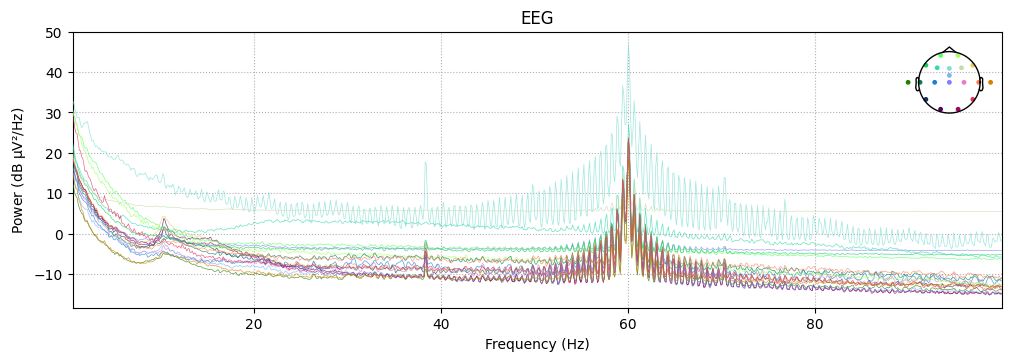

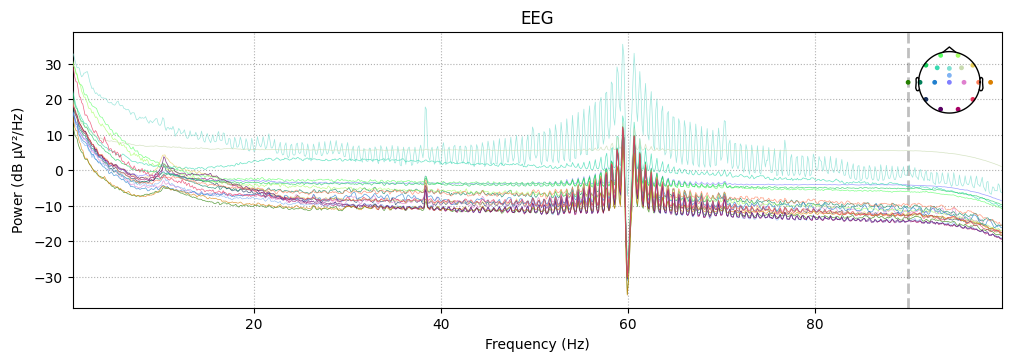

Unique marker letters found: {np.str_('E'), np.str_('M'), np.str_('Z'), np.str_('S'), np.str_('N'), np.str_('G'), np.str_('Q'), np.str_('T'), np.str_('22'), np.str_('F'), np.str_('J'), np.str_('X'), np.str_('D'), np.str_('O'), np.str_('P'), np.str_('R'), np.str_('H'), np.str_('U'), np.str_('B'), np.str_('C'), np.str_('I'), np.str_('A')}
Trial counts for this file:
{'pre_short': 41, 'pre_long': 32, 'post_short': 41, 'post_long': 34}
Used Annotations descriptions: [np.str_('B'), np.str_('I'), np.str_('M'), np.str_('N'), np.str_('R'), np.str_('T'), np.str_('U')]
Not setting metadata
149 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 751 original time points ...
0 bad epochs dropped
Created 149 epochs around 'N' marker.

Processing file: 43000.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effect

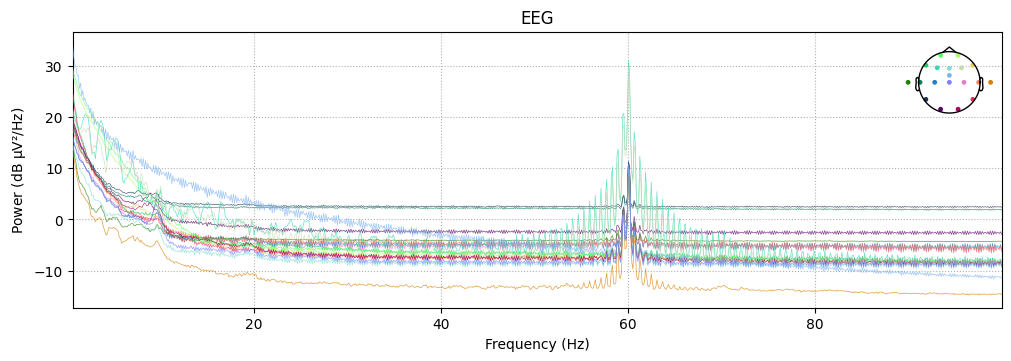

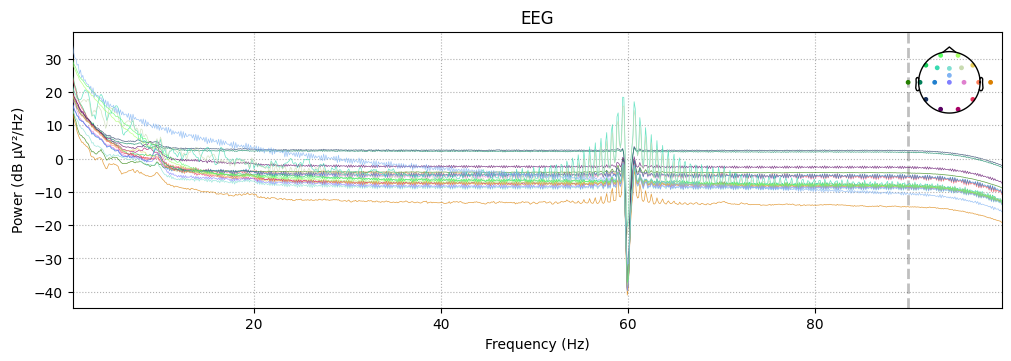

Unique marker letters found: {np.str_('E'), np.str_('M'), np.str_('Z'), np.str_('S'), np.str_('N'), np.str_('G'), np.str_('Q'), np.str_('T'), np.str_('F'), np.str_('J'), np.str_('D'), np.str_('O'), np.str_('P'), np.str_('R'), np.str_('H'), np.str_('U'), np.str_('B'), np.str_('C'), np.str_('I'), np.str_('A')}
Trial counts for this file:
{'pre_short': 42, 'pre_long': 39, 'post_short': 44, 'post_long': 39}
Used Annotations descriptions: [np.str_('B'), np.str_('I'), np.str_('M'), np.str_('N'), np.str_('R'), np.str_('T'), np.str_('U')]
Not setting metadata
164 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 164 events and 751 original time points ...
0 bad epochs dropped
Created 164 epochs around 'N' marker.

Processing file: 47131.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
P

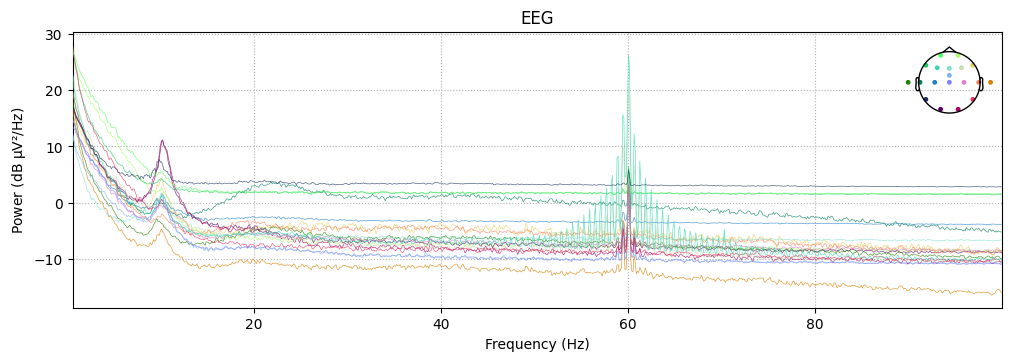

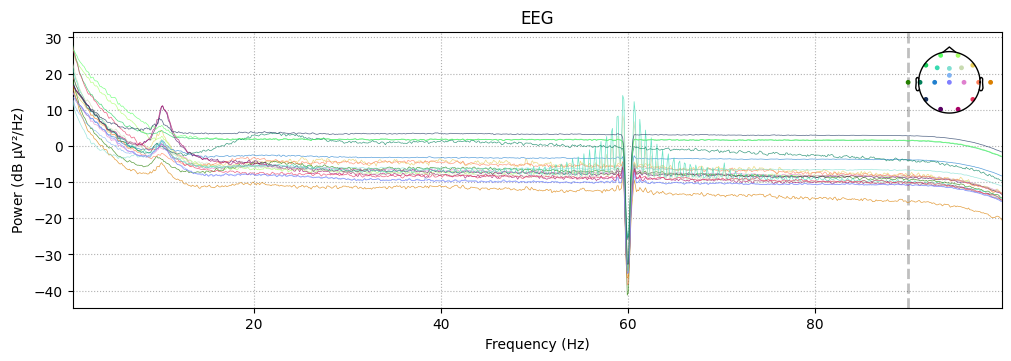

Unique marker letters found: {np.str_('E'), np.str_('24'), np.str_('Event'), np.str_('M'), np.str_('Z'), np.str_('S'), np.str_('N'), np.str_('G'), np.str_('Q'), np.str_('T'), np.str_('K'), np.str_('F'), np.str_('J'), np.str_('X'), np.str_('D'), np.str_('O'), np.str_('P'), np.str_('R'), np.str_('H'), np.str_('U'), np.str_('B'), np.str_('C'), np.str_('I'), np.str_('A')}
Trial counts for this file:
{'pre_short': 44, 'pre_long': 39, 'post_short': 44, 'post_long': 40}
Used Annotations descriptions: [np.str_('B'), np.str_('I'), np.str_('M'), np.str_('N'), np.str_('R'), np.str_('T'), np.str_('U')]
Not setting metadata
165 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 165 events and 751 original time points ...
0 bad epochs dropped
Created 165 epochs around 'N' marker.

Processing file: 47204.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should u

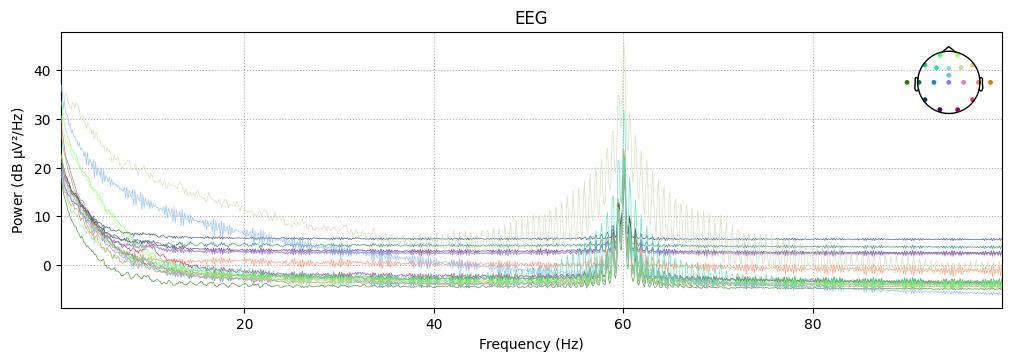

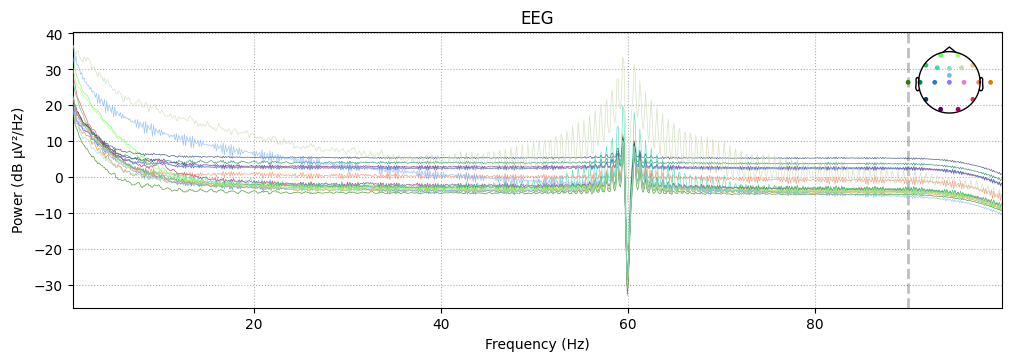

Unique marker letters found: {np.str_('E'), np.str_('Event'), np.str_('M'), np.str_('Z'), np.str_('S'), np.str_('N'), np.str_('G'), np.str_('Q'), np.str_('T'), np.str_('22'), np.str_('F'), np.str_('J'), np.str_('D'), np.str_('O'), np.str_('P'), np.str_('R'), np.str_('H'), np.str_('U'), np.str_('B'), np.str_('C'), np.str_('I'), np.str_('A')}
Trial counts for this file:
{'pre_short': 32, 'pre_long': 37, 'post_short': 43, 'post_long': 38}
Used Annotations descriptions: [np.str_('B'), np.str_('I'), np.str_('M'), np.str_('N'), np.str_('R'), np.str_('T'), np.str_('U')]
Not setting metadata
150 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 751 original time points ...
0 bad epochs dropped
Created 150 epochs around 'N' marker.

Processing file: 47324.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Ef

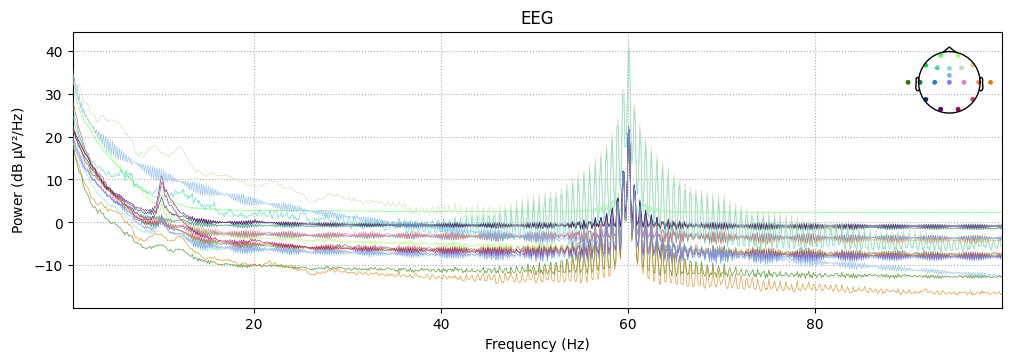

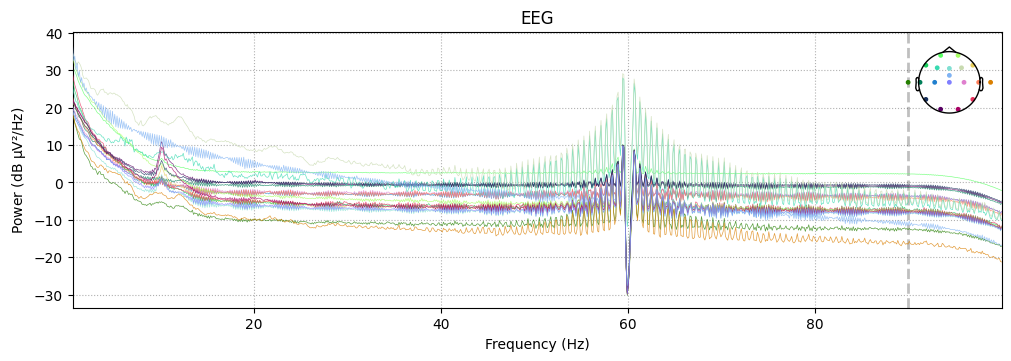

Unique marker letters found: {np.str_('E'), np.str_('M'), np.str_('Z'), np.str_('S'), np.str_('N'), np.str_('G'), np.str_('Q'), np.str_('T'), np.str_('F'), np.str_('J'), np.str_('D'), np.str_('O'), np.str_('21'), np.str_('P'), np.str_('R'), np.str_('H'), np.str_('U'), np.str_('B'), np.str_('C'), np.str_('I'), np.str_('A')}
Trial counts for this file:
{'pre_short': 40, 'pre_long': 28, 'post_short': 40, 'post_long': 23}
Used Annotations descriptions: [np.str_('B'), np.str_('I'), np.str_('M'), np.str_('N'), np.str_('R'), np.str_('T'), np.str_('U')]
Not setting metadata
131 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 131 events and 751 original time points ...
0 bad epochs dropped
Created 131 epochs around 'N' marker.

Processing file: 48238.set
Plotting raw PSD...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window siz

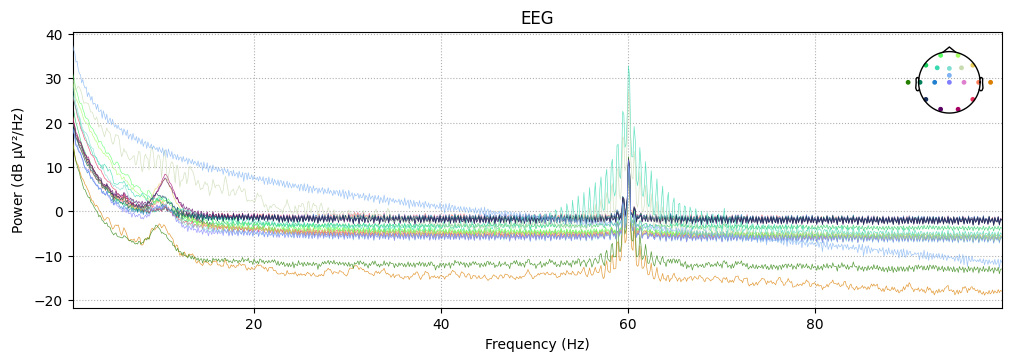

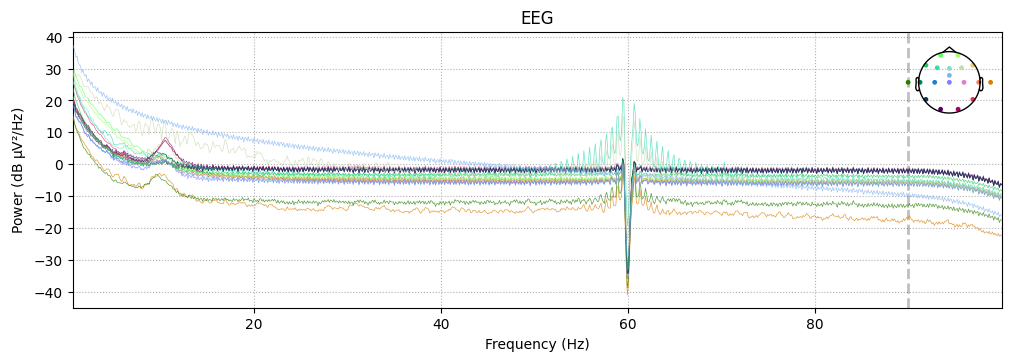

Unique marker letters found: {np.str_('E'), np.str_('M'), np.str_('Z'), np.str_('S'), np.str_('N'), np.str_('G'), np.str_('Q'), np.str_('T'), np.str_('F'), np.str_('J'), np.str_('D'), np.str_('O'), np.str_('21'), np.str_('P'), np.str_('R'), np.str_('H'), np.str_('U'), np.str_('B'), np.str_('C'), np.str_('I'), np.str_('A')}
Trial counts for this file:
{'pre_short': 41, 'pre_long': 37, 'post_short': 45, 'post_long': 39}
Used Annotations descriptions: [np.str_('B'), np.str_('I'), np.str_('M'), np.str_('N'), np.str_('R'), np.str_('T'), np.str_('U')]
Not setting metadata
163 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 163 events and 751 original time points ...
0 bad epochs dropped
Created 163 epochs around 'N' marker.


========== FINAL SUMMARY OF TRIAL COUNTS ==========

File: 31730.set
  pre_short: 41
  pre_long: 32
  post_short: 41
  post_long: 34

File: 43000.se

In [ ]:
import mne
import matplotlib.pyplot as plt

# Replicating the analysis for all the files
set_files = ['31730.set', '43000.set', '47131.set', '47204.set', '47324.set', '48238.set']

# Store trial counts for each file
all_trial_counts = {}

# Store epochs for each file (if you want to analyze them later)
all_epochs = {}

for fname in set_files:
    print(f"\n{'='*50}")
    print(f"Processing file: {fname}")
    print(f"{'='*50}")

    # 1. Load data
    raw = mne.io.read_raw_eeglab(fname, preload=True)

    # Plot raw PSD
    print("Plotting raw PSD...")
    raw.plot_psd(fmin=0.5, fmax=100, show=True)

    # 2. Clean data
    raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)
    raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)

    print("Plotting cleaned PSD...")
    raw_clean.plot_psd(fmin=0.5, fmax=100, show=True)
    plt.show()

    # 3. Extract Annotations & Count Trials
    annotations = raw_clean.annotations
    descriptions = annotations.description

    # ### FIX ###: Rename annotation descriptions to the last token
    # For example, "TRIGGER EVENT B" -> "B", "TRIGGER EVENT T" -> "T", etc.
    for i in range(len(annotations)):
        old_desc = annotations.description[i]
        # Grab the last chunk
        marker = old_desc.split()[-1].strip()
        # Overwrite the annotation's description
        annotations.description[i] = marker

    # Now we can check the unique markers
    marker_letters = [desc for desc in annotations.description]
    unique_markers = set(marker_letters)
    print("Unique marker letters found:", unique_markers)

    # Count trials for pre/post short/long
    trial_counts = {"pre_short": 0, "pre_long": 0, "post_short": 0, "post_long": 0}
    current_block = None

    for desc in annotations.description:
        marker = desc.strip()

        if marker == 'B':
            current_block = 'pre'
        elif marker == 'I':
            current_block = 'post'
        elif marker in ['T', 'U'] and current_block is not None:
            if marker == 'T':
                trial_counts[f"{current_block}_short"] += 1
            elif marker == 'U':
                trial_counts[f"{current_block}_long"] += 1

    all_trial_counts[fname] = trial_counts

    print("Trial counts for this file:")
    print(trial_counts)

    # 4. Epoching at the Trial Level
    event_id_dict = {
        'B': 1,
        'I': 2,
        'M': 3,
        'N': 4,
        'R': 5,
        'T': 6,
        'U': 7
    }
    events, event_id_map = mne.events_from_annotations(raw_clean, event_id=event_id_dict)

    # Create epochs around 'N' (-1.0 to +2.0s)
    if 'N' in event_id_dict:
        n_id = event_id_dict['N']
        epochs = mne.Epochs(raw_clean, events, event_id=n_id,
                            tmin=-1.0, tmax=2.0,
                            baseline=(None, 0),
                            preload=True)
        all_epochs[fname] = epochs
        print(f"Created {len(epochs)} epochs around 'N' marker.")
    else:
        print("WARNING: 'N' marker not found in event_id_dict. No epochs created.")

# Final Summary of Trial Counts
print("\n\n========== FINAL SUMMARY OF TRIAL COUNTS ==========")
for fname, counts in all_trial_counts.items():
    print(f"\nFile: {fname}")
    for cond, count in counts.items():
        print(f"  {cond}: {count}")

print("\n========== EPOCHING COMPLETE ==========")
for fname, epochs in all_epochs.items():
    print(f"File: {fname}, # of epochs around 'N': {len(epochs)}")



PROCESSING FILE: 31730.set
Used Annotations descriptions: [np.str_('N_post'), np.str_('N_pre')]
Not setting metadata
73 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 73 events and 751 original time points ...
0 bad epochs dropped
  Created 73 epochs for PRE-stress.
Not setting metadata
76 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 76 events and 751 original time points ...
0 bad epochs dropped
  Created 76 epochs for POST-stress.

Running FOOOF for PRE-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                

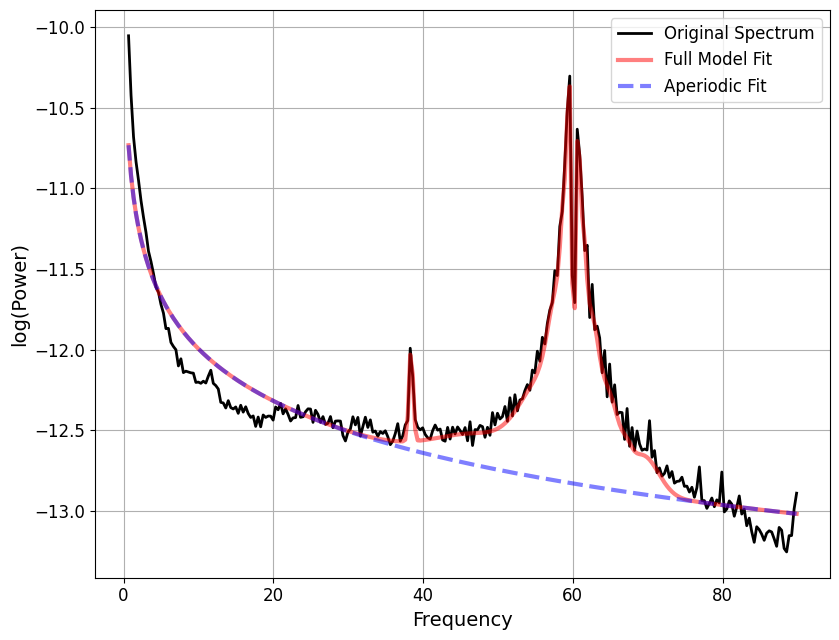

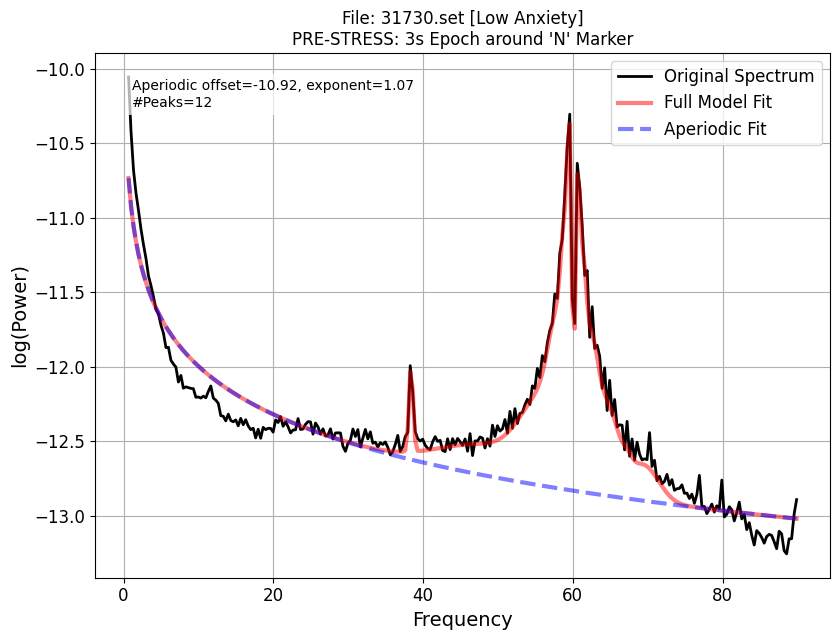


Running FOOOF for POST-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 90 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.2759, 0.2385                                         
                                                                                                  
                                       1

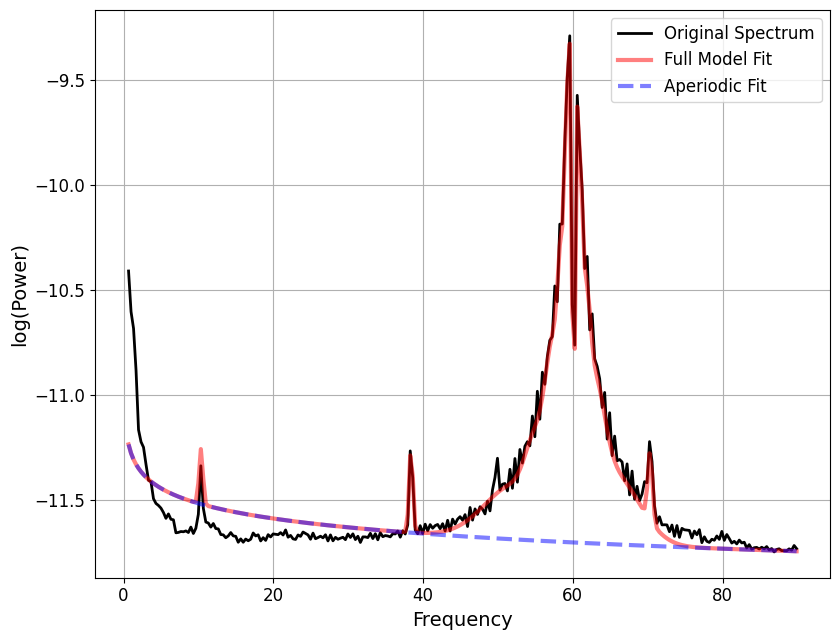

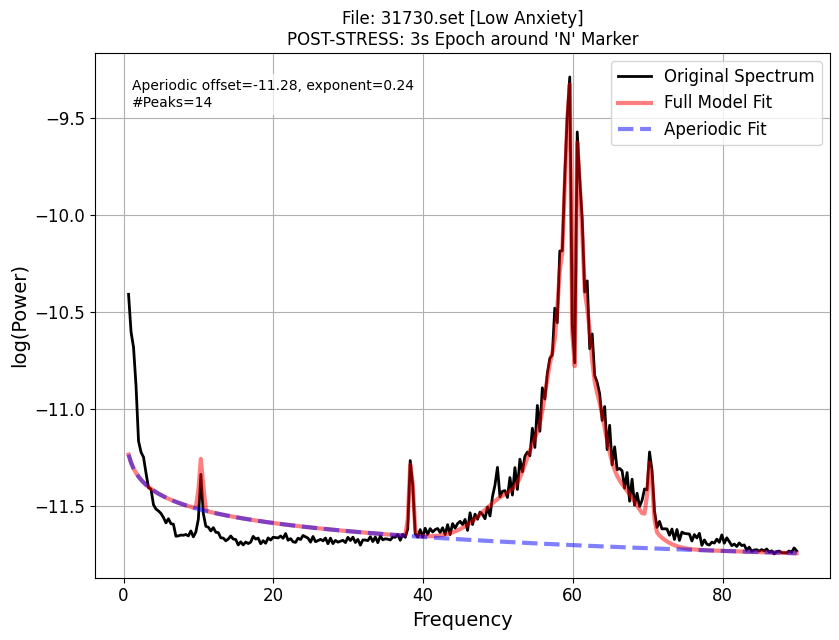


PROCESSING FILE: 43000.set
Used Annotations descriptions: [np.str_('N_post'), np.str_('N_pre')]
Not setting metadata
81 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 81 events and 751 original time points ...
0 bad epochs dropped
  Created 81 epochs for PRE-stress.
Not setting metadata
83 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 83 events and 751 original time points ...
0 bad epochs dropped
  Created 83 epochs for POST-stress.

Running FOOOF for PRE-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                

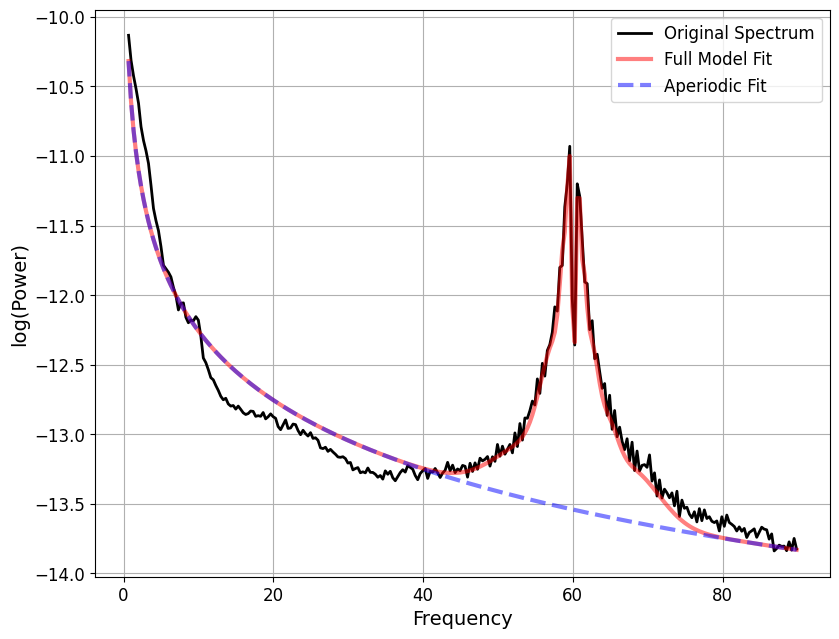

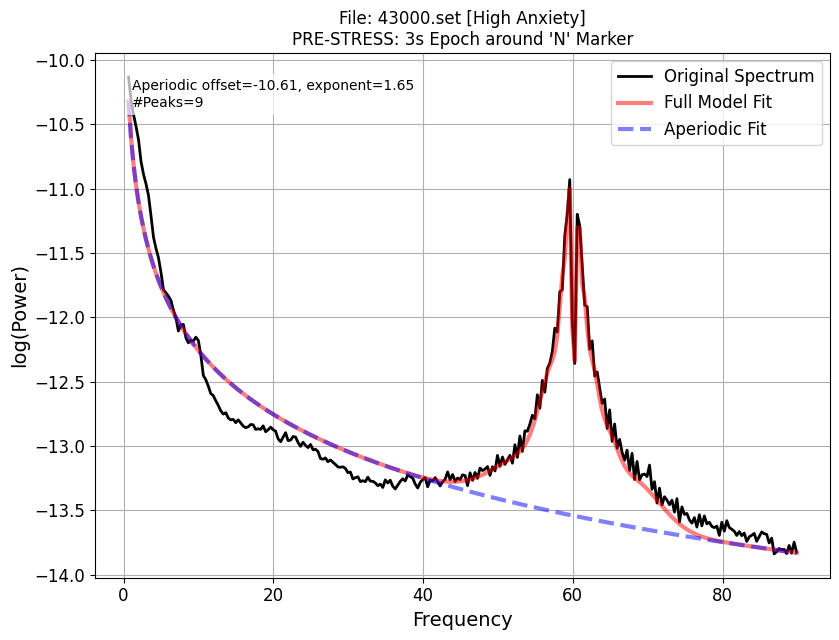


Running FOOOF for POST-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 90 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.5217, 0.8172                                         
                                                                                                  
                                       9

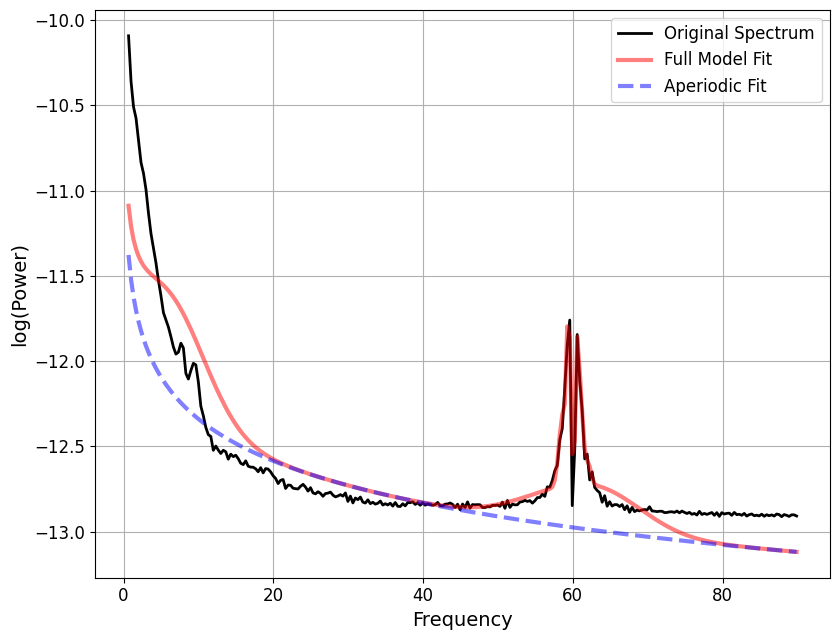

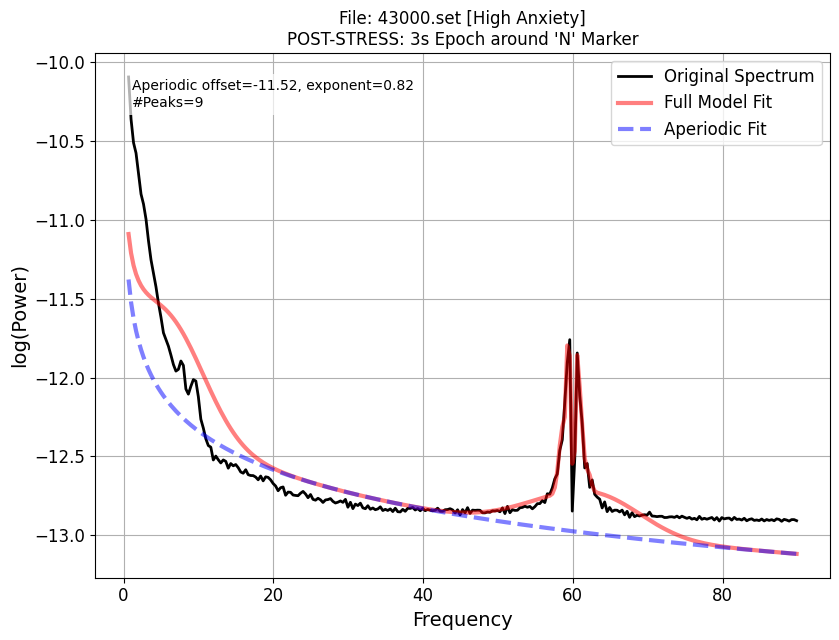


PROCESSING FILE: 47131.set
Used Annotations descriptions: [np.str_('N_post'), np.str_('N_pre')]
Not setting metadata
83 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 83 events and 751 original time points ...
0 bad epochs dropped
  Created 83 epochs for PRE-stress.
Not setting metadata
82 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 82 events and 751 original time points ...
0 bad epochs dropped
  Created 82 epochs for POST-stress.

Running FOOOF for PRE-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                

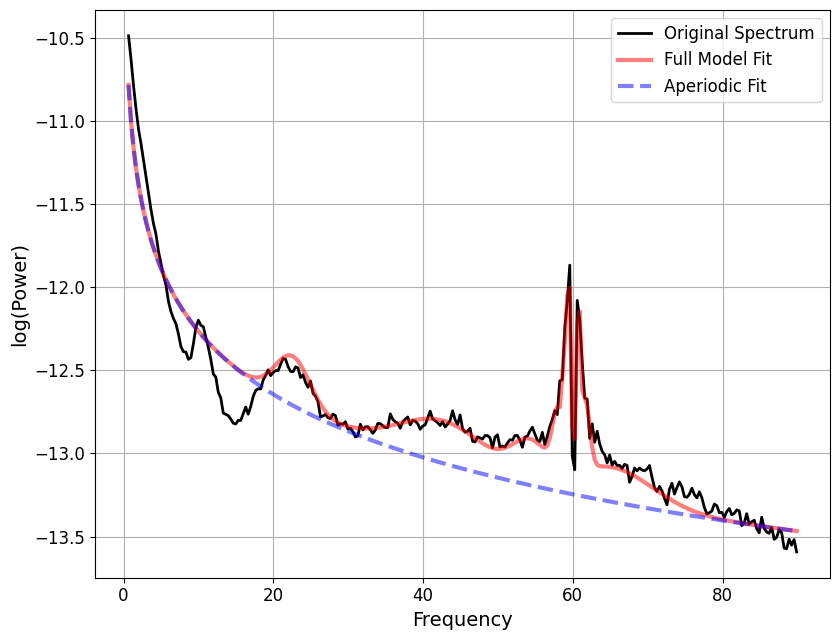

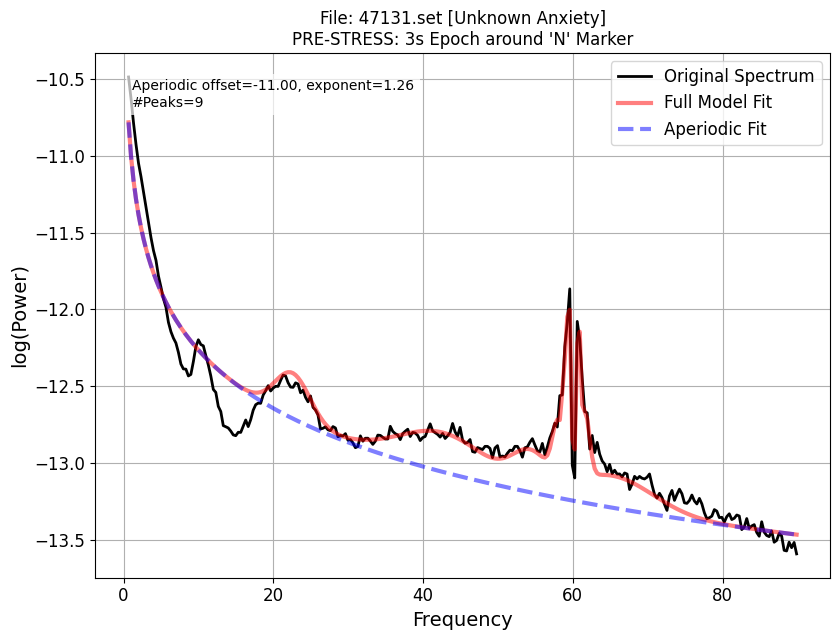


Running FOOOF for POST-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 90 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -10.8194, 1.5247                                         
                                                                                                  
                                       8

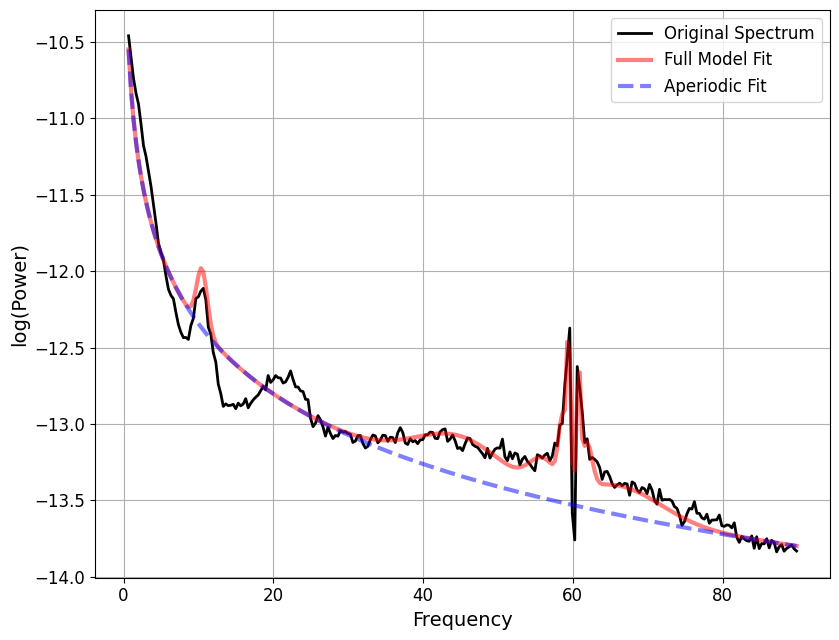

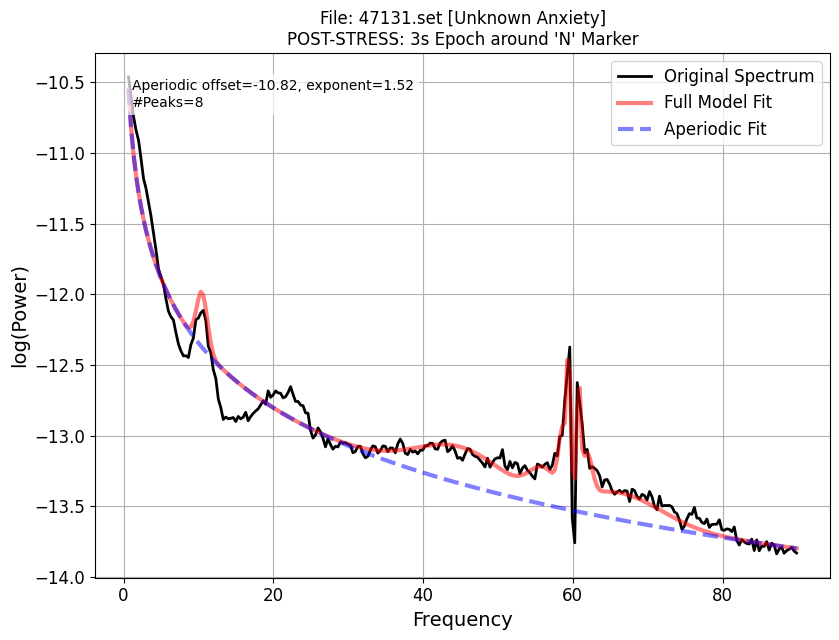


PROCESSING FILE: 47204.set
Used Annotations descriptions: [np.str_('N_post'), np.str_('N_pre')]
Not setting metadata
69 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 69 events and 751 original time points ...
0 bad epochs dropped
  Created 69 epochs for PRE-stress.
Not setting metadata
81 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 81 events and 751 original time points ...
0 bad epochs dropped
  Created 81 epochs for POST-stress.

Running FOOOF for PRE-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                

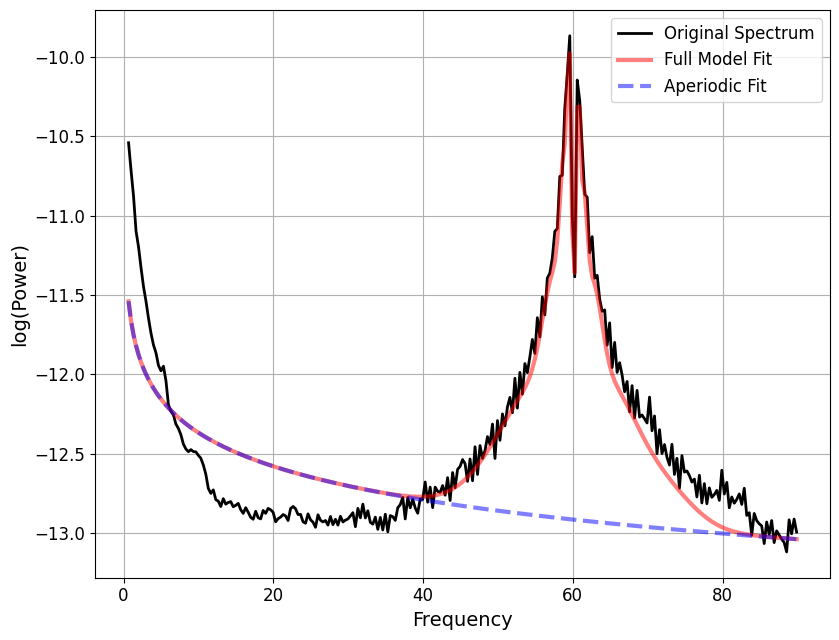

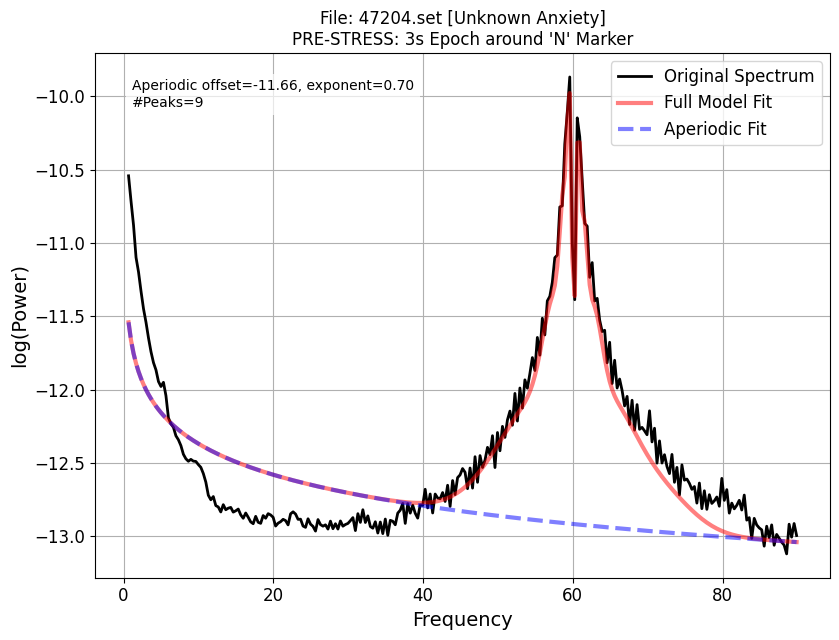


Running FOOOF for POST-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 90 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.1846, 1.0523                                         
                                                                                                  
                                       4

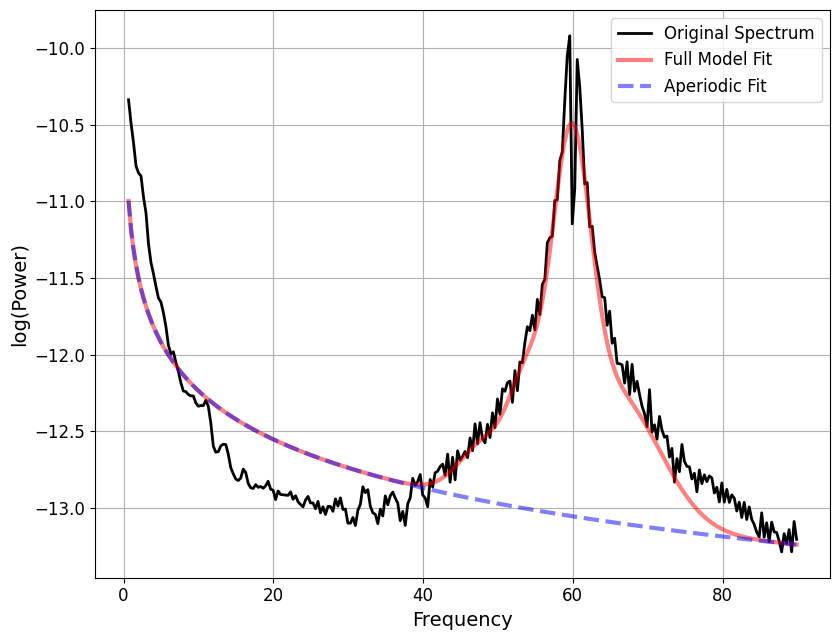

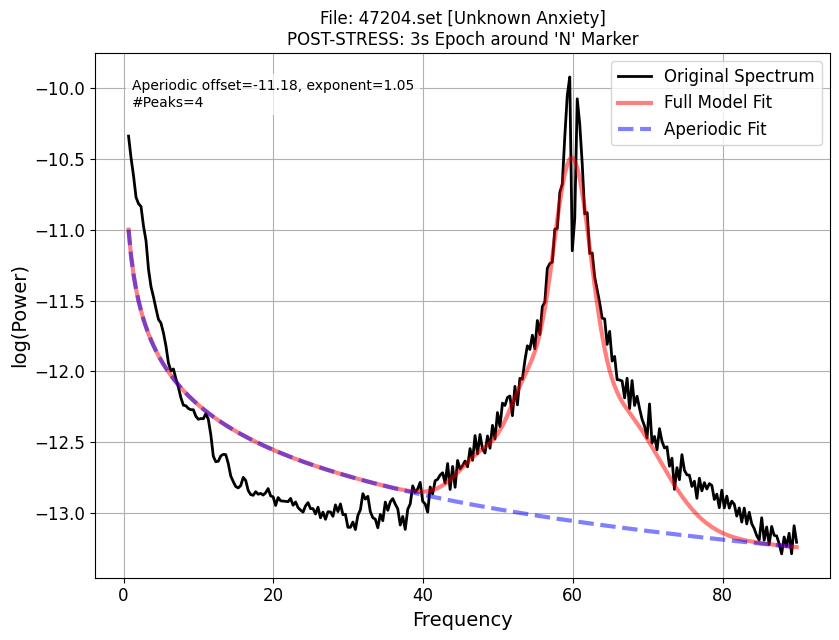


PROCESSING FILE: 47324.set
Used Annotations descriptions: [np.str_('N_post'), np.str_('N_pre')]
Not setting metadata
68 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 68 events and 751 original time points ...
0 bad epochs dropped
  Created 68 epochs for PRE-stress.
Not setting metadata
63 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 63 events and 751 original time points ...
0 bad epochs dropped
  Created 63 epochs for POST-stress.

Running FOOOF for PRE-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                

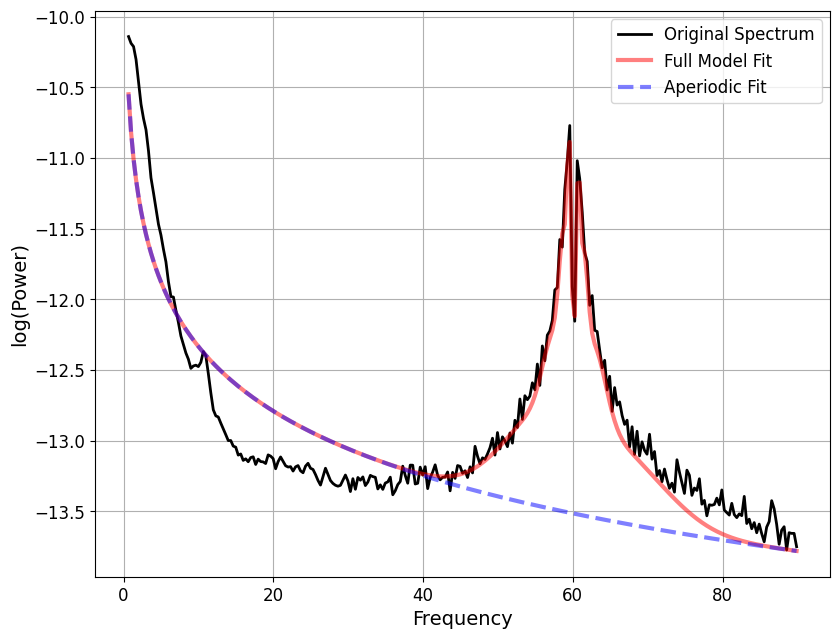

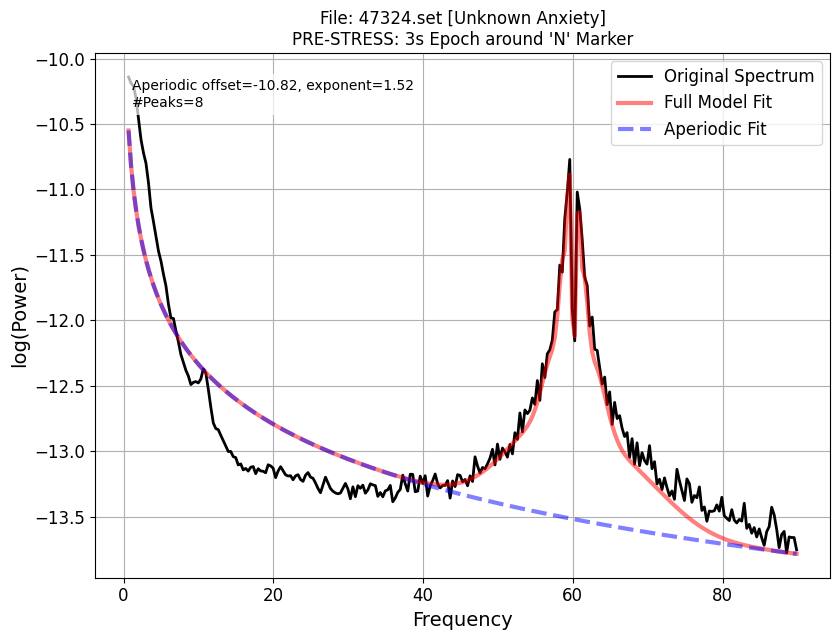


Running FOOOF for POST-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 90 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -12.0483, 0.6008                                         
                                                                                                  
                                       1

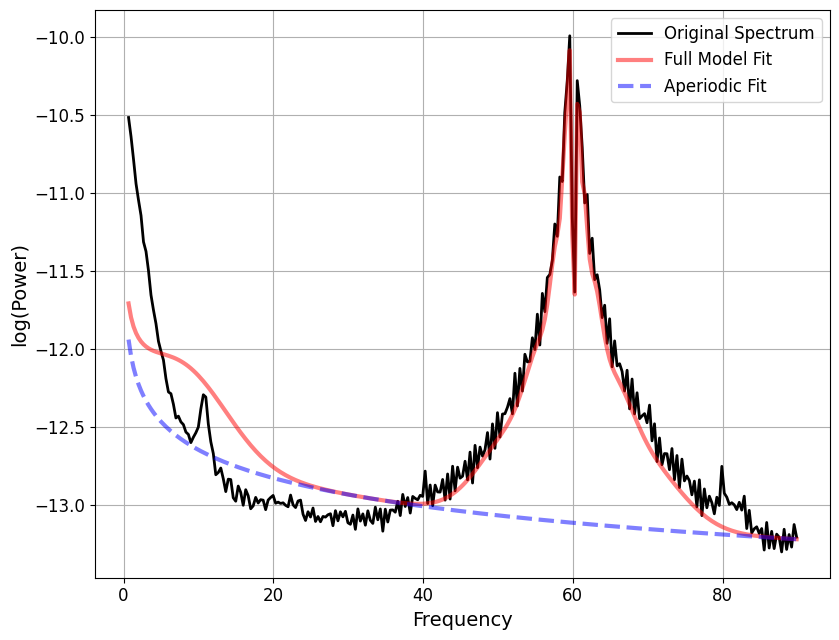

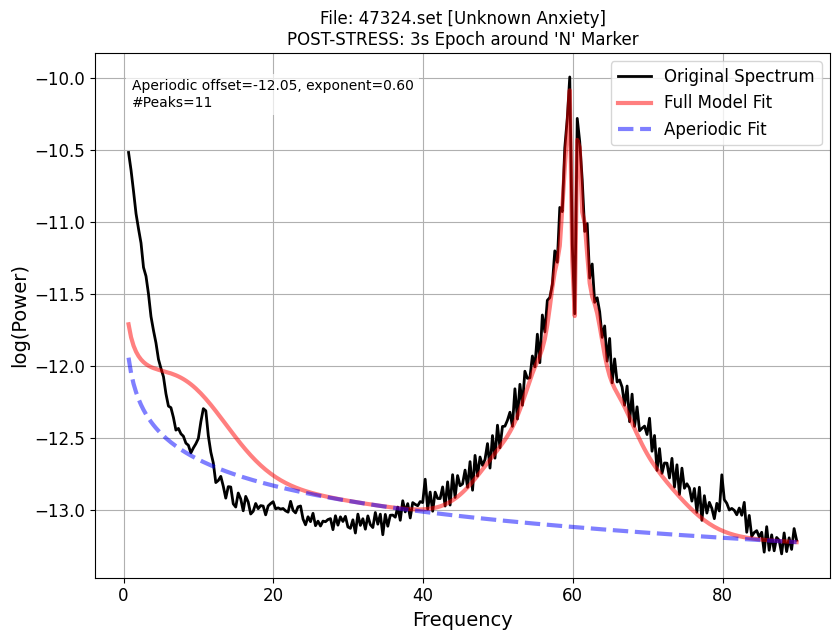


PROCESSING FILE: 48238.set
Used Annotations descriptions: [np.str_('N_post'), np.str_('N_pre')]
Not setting metadata
79 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 751 original time points ...
0 bad epochs dropped
  Created 79 epochs for PRE-stress.
Not setting metadata
84 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 84 events and 751 original time points ...
0 bad epochs dropped
  Created 84 epochs for POST-stress.

Running FOOOF for PRE-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                

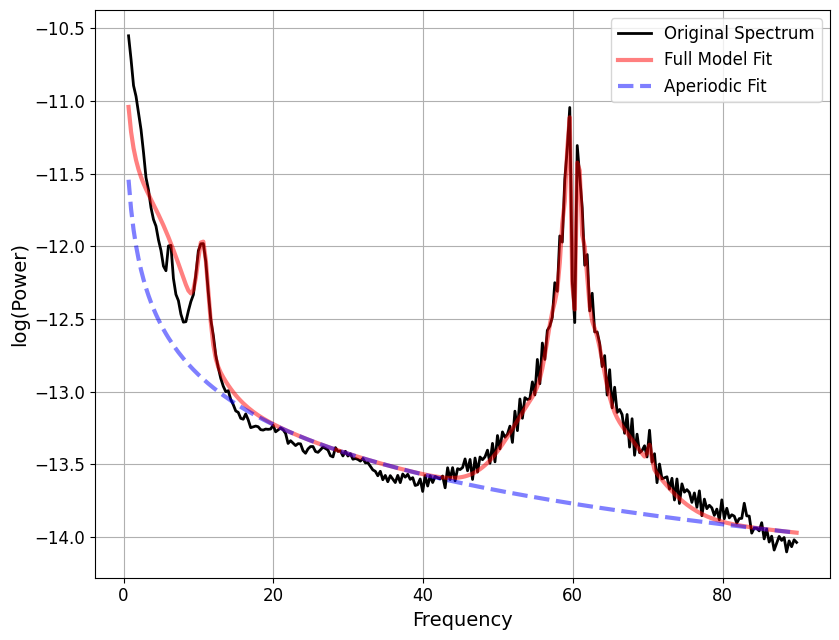

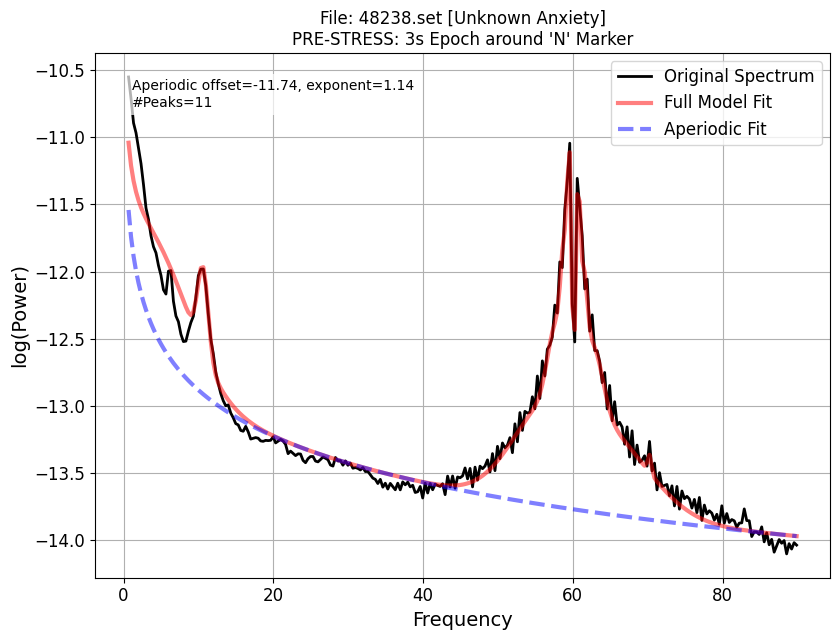


Running FOOOF for POST-stress ...
Effective window size : 3.004 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 90 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -12.0234, 1.0000                                         
                                                                                                  
                                       1

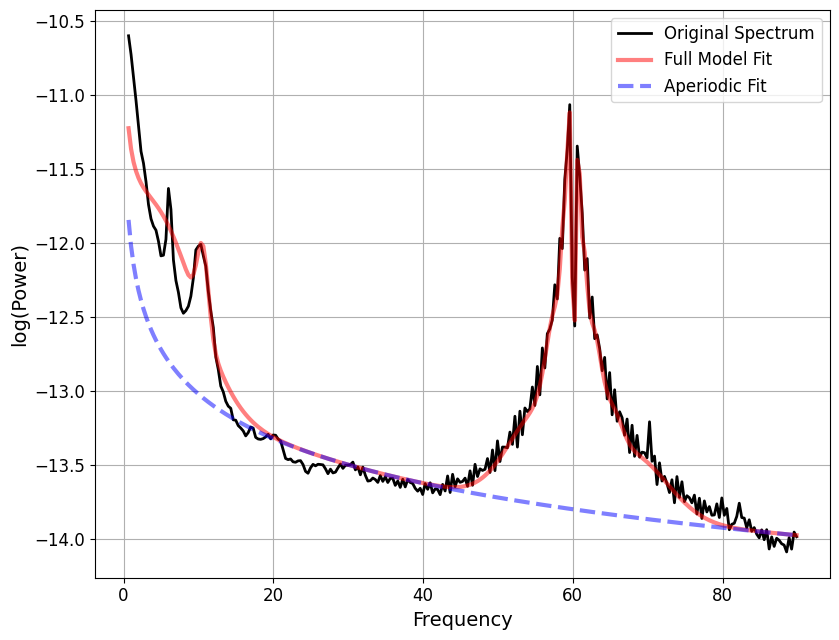

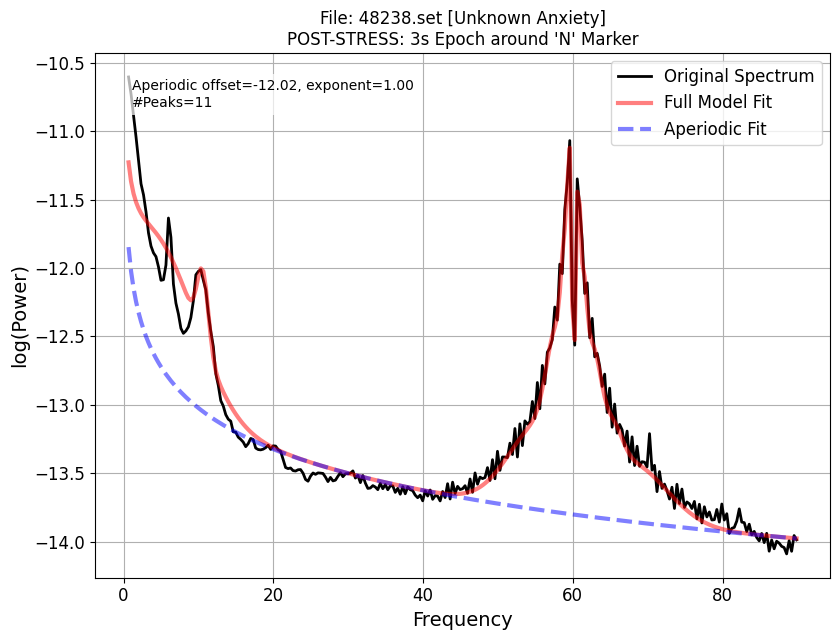



===== FOOOF SUMMARY ACROSS ALL FILES =====
31730.set [PRE] => offset=-10.923, exponent=1.073, #peaks=12
31730.set [POST] => offset=-11.276, exponent=0.239, #peaks=14
43000.set [PRE] => offset=-10.609, exponent=1.649, #peaks=9
43000.set [POST] => offset=-11.522, exponent=0.817, #peaks=9
47131.set [PRE] => offset=-11.005, exponent=1.260, #peaks=9
47131.set [POST] => offset=-10.819, exponent=1.525, #peaks=8
47204.set [PRE] => offset=-11.664, exponent=0.703, #peaks=9
47204.set [POST] => offset=-11.185, exponent=1.052, #peaks=4
47324.set [PRE] => offset=-10.817, exponent=1.517, #peaks=8
47324.set [POST] => offset=-12.048, exponent=0.601, #peaks=11
48238.set [PRE] => offset=-11.743, exponent=1.140, #peaks=11
48238.set [POST] => offset=-12.023, exponent=1.000, #peaks=11


<ipython-input-54-e6af5f1d405a>:185: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_exponents, post_exponents], labels=['Pre-Stress', 'Post-Stress'])


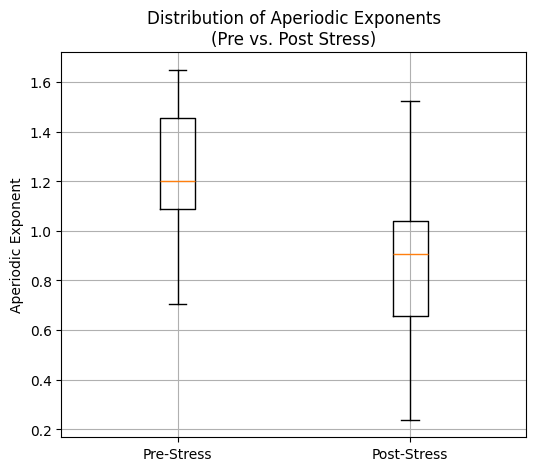

In [ ]:
#############################################
# FILE LIST & OPTIONAL ANXIETY LABELS
#############################################
set_files = [
    '31730.set',  # Low anxiety (known)
    '43000.set',  # High anxiety
    '47131.set',
    '47204.set',
    '47324.set',
    '48238.set'
]

# Map file names to anxiety levels
anxiety_labels = {
    '31730.set': 'Low Anxiety',
    '43000.set': 'High Anxiety'
}

# We'll store:
#   fooof_results[file_name]['pre'] = dict with offset, exponent, peaks
#   fooof_results[file_name]['post'] = dict with offset, exponent, peaks
fooof_results = {}

# Collect exponents for group-level boxplot
pre_exponents = []
post_exponents = []

#############################################
# MAIN LOOP OVER FILES
#############################################
for fname in set_files:
    print("\n" + "="*70)
    print(f"PROCESSING FILE: {fname}")
    print("="*70)

    # -----------------------------------------------------
    # 1) Load & Clean Data
    # -----------------------------------------------------
    raw = mne.io.read_raw_eeglab(fname, preload=True)

    raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)
    raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)

    # -----------------------------------------------------
    # 2) Relabel "N" Markers as "N_pre" or "N_post"
    # -----------------------------------------------------
    annotations = raw_clean.annotations
    current_block = None
    for i in range(len(annotations)):
        old_desc = annotations.description[i]
        marker = old_desc.split()[-1].strip()

        # Track block changes
        if marker == 'B':
            current_block = 'pre'
        elif marker == 'I':
            current_block = 'post'

        # If we see "N", rename to "N_pre"/"N_post"
        if marker == 'N' and current_block is not None:
            annotations.description[i] = f"N_{current_block}"
        else:
            # Overwrite with the short marker (so "TRIGGER EVENT B" -> "B")
            annotations.description[i] = marker

    # -----------------------------------------------------
    # 3) Create Epochs for N_pre & N_post
    # -----------------------------------------------------
    event_id_dict = {'N_pre': 10, 'N_post': 20}
    events, event_id_map = mne.events_from_annotations(raw_clean, event_id=event_id_dict)

    epochs_pre = None
    epochs_post = None

    if 'N_pre' in event_id_map:
        epochs_pre = mne.Epochs(raw_clean, events, event_id=event_id_map['N_pre'],
                                tmin=-1.0, tmax=2.0, baseline=(None, 0),
                                preload=True)
        print(f"  Created {len(epochs_pre)} epochs for PRE-stress.")
    else:
        print("  WARNING: No PRE (N_pre) events found in this file.")

    if 'N_post' in event_id_map:
        epochs_post = mne.Epochs(raw_clean, events, event_id=event_id_map['N_post'],
                                 tmin=-1.0, tmax=2.0, baseline=(None, 0),
                                 preload=True)
        print(f"  Created {len(epochs_post)} epochs for POST-stress.")
    else:
        print("  WARNING: No POST (N_post) events found in this file.")

    # -----------------------------------------------------
    # 4) FOOOF for Pre & Post
    # -----------------------------------------------------
    fooof_results[fname] = {}
    anxiety_level = anxiety_labels.get(fname, 'Unknown Anxiety')

    for condition, these_epochs in [('pre', epochs_pre), ('post', epochs_post)]:
        if these_epochs is None or len(these_epochs) == 0:
            fooof_results[fname][condition] = None
            print(f"  [Skipping FOOOF for {condition.upper()} - no epochs]")
            continue

        print(f"\nRunning FOOOF for {condition.upper()}-stress ...")

        # Compute PSD
        psd_obj = these_epochs.compute_psd(method='welch', fmin=0.5, fmax=90)
        psds = psd_obj.get_data()  # shape (n_epochs, n_channels, n_freqs)
        freqs = psd_obj.freqs

        # Average across epochs & channels
        psd_mean = psds.mean(axis=0).mean(axis=0)

        # FOOOF
        fm = FOOOF()
        fm.fit(freqs, psd_mean)

        offset, exponent = fm.aperiodic_params_
        peaks = fm.peak_params_

        # Store in dictionary
        fooof_results[fname][condition] = {
            'aperiodic': (offset, exponent),
            'peaks': peaks
        }

        # Save exponents for group boxplot
        if condition == 'pre':
            pre_exponents.append(exponent)
        else:
            post_exponents.append(exponent)


        # This prints the "big box" summary from FOOOF.
        fm.report()

        print(f"    => {condition.upper()} aperiodic: offset={offset:.3f}, exponent={exponent:.3f}")
        print(f"    => {condition.upper()} # of peaks: {len(peaks)}")
        # Show MNE's effective window size
        sfreq = these_epochs.info['sfreq']
        n_per_seg = int(sfreq * 3.0)  # default window size = 3s
        win_size = n_per_seg / sfreq
        print(f"Effective window size : {win_size:.3f} (s)")

        # Plot the FOOOF model
        fm.plot(add_peaks='shade-line-dot')

        import matplotlib.pyplot as plt
        fig = plt.gcf()  # current figure
        ax = plt.gca()   # current axes

        ax.set_title(
            f"File: {fname} [{anxiety_level}]\n"
            f"{condition.upper()}-STRESS: 3s Epoch around 'N' Marker",
            fontsize=12
        )
        ax.text(
            0.05, 0.95,
            f"Aperiodic offset={offset:.2f}, exponent={exponent:.2f}\n"
            f"#Peaks={len(peaks)}",
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        )

        plt.show()


# ---------------------------------------------------------
# 5) PRINT FINAL SUMMARY & PLOT DISTRIBUTIONS
# ---------------------------------------------------------
print("\n\n===== FOOOF SUMMARY ACROSS ALL FILES =====")
for fname in set_files:
    res = fooof_results[fname]
    for cond in ['pre', 'post']:
        cond_res = res.get(cond, None)
        if cond_res is None:
            print(f"{fname} [{cond.upper()}]: No results.")
        else:
            off, exp = cond_res['aperiodic']
            peaks = cond_res['peaks']
            print(f"{fname} [{cond.upper()}] => offset={off:.3f}, exponent={exp:.3f}, #peaks={len(peaks)}")

# Plot boxplot of exponents, Pre vs. Post
plt.figure(figsize=(6,5))
plt.boxplot([pre_exponents, post_exponents], labels=['Pre-Stress', 'Post-Stress'])
plt.title("Distribution of Aperiodic Exponents\n(Pre vs. Post Stress)")
plt.ylabel("Aperiodic Exponent")
plt.grid(True)
plt.show()
